In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [349]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [350]:
LeadScore_df = pd.read_csv("Lead-analysis/LeadGenLN.csv", encoding='utf-8-sig',parse_dates=['Web_Date','SubYearMonth','Lead_Capture_Date','Inception_Date_LT','Year_Established.1'])
LeadScore_df

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,LT_FILTERID,LTTest_Naics,...,Web_Form_Name,Web_Gross_Annual_Sales,Web_Time_in_Business,Year_Established,Year_Established.1,Merged Years in Business,LT NAICS Form Value,2 Digit NAICS Code,NAICS 2 Digit Label,NAICS 2 Digit Index
0,110000.0,2020-09-01,0,0,2021-09-06,00Q4u00001h77U6EAI,24,LLC,902932,NaN,...,NaN,$100k-$200k,NaN,NaN,2020-01-01,1,NaN,NaN,NaN,NaN
1,459000.0,2020-08-01,0,0,2021-08-29,00Q4u00001gxIDDEA2,9,LLC,900069,NaN,...,NaN,$200k-$500k,NaN,NaN,2020-01-01,1,NaN,NaN,NaN,NaN
2,100000.0,2020-08-01,0,0,2021-09-02,00Q4u00001gy2XREAY,12,LLC,900068,NaN,...,NaN,$100k-$200k,NaN,NaN,2020-01-01,1,NaN,NaN,NaN,NaN
3,300000.0,2020-08-01,0,0,2021-09-05,00Q4u00001h74ILEAY,22,SCORPORATION,900069,NaN,...,NaN,$200k-$500k,NaN,NaN,2020-01-01,1,NaN,NaN,NaN,NaN
4,450000.0,2020-07-01,0,0,2021-07-22,00Q4u00001gR6YMEA0,11,SCORPORATION,900069,NaN,...,NaN,$200k-$500k,NaN,NaN,2020-01-01,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79946,180000.0,1980-09-01,0,0,2021-03-09,00Q4u00001e0KxhEAE,15,SCORPORATION,900068,WHOLESALETRADE,...,NaN,$100k-$200k,NaN,NaN,1980-01-01,40,WHOLESALETRADE,42.0,Wholesale Trade,22.0
79947,175000.0,1970-05-01,0,0,2021-01-25,00Q4u00001dF2mXEAS,19,CORPORATION,900068,WHOLESALETRADE,...,NaN,$100k-$200k,NaN,NaN,1970-01-01,50,WHOLESALETRADE,42.0,Wholesale Trade,22.0
79948,5500000.0,1961-06-01,0,0,2021-04-05,00Q4u00001e4E28EAE,18,SCORPORATION,900070,WHOLESALETRADE,...,NaN,$1mm+,NaN,NaN,1961-01-01,59,WHOLESALETRADE,42.0,Wholesale Trade,22.0
79949,1000000.0,2015-09-01,0,0,2021-07-01,00Q4u00001fv6RqEAI,24,LLC,908867,Wholesale Trade,...,NaN,NaN,NaN,NaN,2015-01-01,5,Wholesale Trade,42.0,Wholesale Trade,22.0


In [351]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79951 entries, 0 to 79950
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AnnualRevenue             54940 non-null  float64       
 1   Inception_Date_LT         23539 non-null  datetime64[ns]
 2   Is_Funded                 79951 non-null  int64         
 3   Is_Submitted              79951 non-null  int64         
 4   Lead_Capture_Date         79951 non-null  datetime64[ns]
 5   LEAD_ID                   79951 non-null  object        
 6   Lead_Score                79951 non-null  int64         
 7   Legal_Entity_Type_LT      23539 non-null  object        
 8   LT_FILTERID               24881 non-null  object        
 9   LTTest_Naics              17555 non-null  object        
 10  OPPORTUNITY_ID            79951 non-null  object        
 11  Requested_Amount          39028 non-null  float64       
 12  Self_Graded_Credit

In [352]:
LeadScore_df.isnull().sum()

AnnualRevenue               25011
Inception_Date_LT           56412
Is_Funded                       0
Is_Submitted                    0
Lead_Capture_Date               0
LEAD_ID                         0
Lead_Score                      0
Legal_Entity_Type_LT        56412
LT_FILTERID                 55070
LTTest_Naics                62396
OPPORTUNITY_ID                  0
Requested_Amount            40923
Self_Graded_Credit           9644
SubYearMonth                67153
Type_of_Entity              67775
Web_Ad_Outlet                1118
Web_Ad_Outlet_Source          450
Web_Amount_to_Borrow        44667
Web_Date                    24878
Web_Form_Name               79951
Web_Gross_Annual_Sales      15087
Web_Time_in_Business        44453
Year_Established            60182
Year_Established.1          56412
Merged Years in Business    56276
LT NAICS Form Value         62507
2 Digit NAICS Code          62507
NAICS 2 Digit Label         62507
NAICS 2 Digit Index         62507
dtype: int64

In [353]:
LeadScore_df.columns

Index(['AnnualRevenue', 'Inception_Date_LT', 'Is_Funded', 'Is_Submitted',
       'Lead_Capture_Date', 'LEAD_ID', 'Lead_Score', 'Legal_Entity_Type_LT',
       'LT_FILTERID', 'LTTest_Naics', 'OPPORTUNITY_ID', 'Requested_Amount',
       'Self_Graded_Credit', 'SubYearMonth', 'Type_of_Entity', 'Web_Ad_Outlet',
       'Web_Ad_Outlet_Source', 'Web_Amount_to_Borrow', 'Web_Date',
       'Web_Form_Name', 'Web_Gross_Annual_Sales', 'Web_Time_in_Business',
       'Year_Established', 'Year_Established.1', 'Merged Years in Business',
       'LT NAICS Form Value', '2 Digit NAICS Code', 'NAICS 2 Digit Label',
       'NAICS 2 Digit Index'],
      dtype='object')

In [354]:
LeadScore_df.groupby('Is_Submitted').size()

Is_Submitted
0    67153
1    12798
dtype: int64

In [355]:
LeadScore_df['Web_Amount_to_Borrow'] = LeadScore_df['Web_Amount_to_Borrow'].str.replace(',','')

In [356]:
LeadScore_mask = (LeadScore_df.Web_Ad_Outlet_Source == "Lending Tree") 

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,LT_FILTERID,LTTest_Naics,...,Web_Form_Name,Web_Gross_Annual_Sales,Web_Time_in_Business,Year_Established,Year_Established.1,Merged Years in Business,LT NAICS Form Value,2 Digit NAICS Code,NAICS 2 Digit Label,NAICS 2 Digit Index
0,110000.0,2020-09-01,0,0,2021-09-06,00Q4u00001h77U6EAI,24,LLC,902932,NaN,...,NaN,$100k-$200k,NaN,NaN,2020-01-01,1,NaN,NaN,NaN,NaN
1,459000.0,2020-08-01,0,0,2021-08-29,00Q4u00001gxIDDEA2,9,LLC,900069,NaN,...,NaN,$200k-$500k,NaN,NaN,2020-01-01,1,NaN,NaN,NaN,NaN
2,100000.0,2020-08-01,0,0,2021-09-02,00Q4u00001gy2XREAY,12,LLC,900068,NaN,...,NaN,$100k-$200k,NaN,NaN,2020-01-01,1,NaN,NaN,NaN,NaN
3,300000.0,2020-08-01,0,0,2021-09-05,00Q4u00001h74ILEAY,22,SCORPORATION,900069,NaN,...,NaN,$200k-$500k,NaN,NaN,2020-01-01,1,NaN,NaN,NaN,NaN
4,450000.0,2020-07-01,0,0,2021-07-22,00Q4u00001gR6YMEA0,11,SCORPORATION,900069,NaN,...,NaN,$200k-$500k,NaN,NaN,2020-01-01,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79946,180000.0,1980-09-01,0,0,2021-03-09,00Q4u00001e0KxhEAE,15,SCORPORATION,900068,WHOLESALETRADE,...,NaN,$100k-$200k,NaN,NaN,1980-01-01,40,WHOLESALETRADE,42.0,Wholesale Trade,22.0
79947,175000.0,1970-05-01,0,0,2021-01-25,00Q4u00001dF2mXEAS,19,CORPORATION,900068,WHOLESALETRADE,...,NaN,$100k-$200k,NaN,NaN,1970-01-01,50,WHOLESALETRADE,42.0,Wholesale Trade,22.0
79948,5500000.0,1961-06-01,0,0,2021-04-05,00Q4u00001e4E28EAE,18,SCORPORATION,900070,WHOLESALETRADE,...,NaN,$1mm+,NaN,NaN,1961-01-01,59,WHOLESALETRADE,42.0,Wholesale Trade,22.0
79949,1000000.0,2015-09-01,0,0,2021-07-01,00Q4u00001fv6RqEAI,24,LLC,908867,Wholesale Trade,...,NaN,NaN,NaN,NaN,2015-01-01,5,Wholesale Trade,42.0,Wholesale Trade,22.0


In [369]:
Submitted = (sum(Lead_filtered["Is_Submitted"])/len(Lead_filtered['Is_Submitted'].index))*100
Submitted

14.242270653826662

In [357]:
Lead_filtered['Web_Time_in_Business'].fillna(Lead_filtered['Merged Years in Business'], inplace = True)
Lead_filtered['Merged Years in Business'].fillna(Lead_filtered['Web_Time_in_Business'], inplace = True)

In [358]:
Lead_filtered.isnull().sum()

AnnualRevenue                 137
Inception_Date_LT             137
Is_Funded                       0
Is_Submitted                    0
Lead_Capture_Date               0
LEAD_ID                         0
Lead_Score                      0
Legal_Entity_Type_LT          137
LT_FILTERID                   136
LTTest_Naics                 6121
OPPORTUNITY_ID                  0
Requested_Amount              137
Self_Graded_Credit              1
SubYearMonth                20304
Type_of_Entity              23668
Web_Ad_Outlet                   0
Web_Ad_Outlet_Source            0
Web_Amount_to_Borrow        23526
Web_Date                        0
Web_Form_Name               23676
Web_Gross_Annual_Sales       3328
Web_Time_in_Business            0
Year_Established            23676
Year_Established.1            137
Merged Years in Business        0
LT NAICS Form Value          6232
2 Digit NAICS Code           6232
NAICS 2 Digit Label          6232
NAICS 2 Digit Index          6232
dtype: int64

In [359]:
Lead_filtered.groupby('LTTest_Naics').sum()['Is_Submitted']

LTTest_Naics
ACCOMMODATIONANDFOODSERVICES                   144
ACCOUNTANTS                                      0
ADMINSUPPORTWASTEMGMTANDREMEDIATIONSERVICES     14
ADVERTISING_AGENCIES                             0
AGRICULTUREFORESTRYFISHINGANDHUNTING            44
                                              ... 
VENDING                                          1
VETERINARY_SERVICES                              0
VITAMIN_RETAILERS                                0
WHOLESALETRADE                                  62
Wholesale Trade                                  0
Name: Is_Submitted, Length: 125, dtype: int64

In [360]:
Lead_filtered.groupby('NAICS 2 Digit Label').sum()['Is_Submitted']

NAICS 2 Digit Label
Accommodation and Food Services                                             144
Administrative and Support and Waste Management and Remediation Services     17
Agriculture, Forestry, Fishing and Hunting                                   44
Arts, Entertainment, and Recreation                                         102
Construction                                                                510
Educational Services                                                         62
Finance and Insurance                                                        65
Health Care and Social Assistance                                           159
Information                                                                  31
Management of Companies and Enterprises                                      29
Manufacturing                                                                74
Mining                                                                        3
Non Profit          

In [370]:
Lead_filtered.groupby('NAICS 2 Digit Label').size()

NAICS 2 Digit Label
Accommodation and Food Services                                             1255
Administrative and Support and Waste Management and Remediation Services     122
Agriculture, Forestry, Fishing and Hunting                                   427
Arts, Entertainment, and Recreation                                          798
Construction                                                                3291
Educational Services                                                         391
Finance and Insurance                                                        377
Health Care and Social Assistance                                            949
Information                                                                  211
Management of Companies and Enterprises                                      195
Manufacturing                                                                500
Mining                                                                        30
Non Prof

In [361]:
#NAICS 2 Digit Index Dictionary
#'Accommodation and Food Services' :2, 'Administrative and Support and Waste Management and Remediation Services':3,
#'Agriculture, Forestry, Fishing and Hunting':4, 'Arts, Entertainment, and Recreation':5,'Construction' :6 , 'Educational Services':7
#'Finance and Insurance':8, 'Health Care and Social Assistance':9, 'Information':10,'Management of Companies and Enterprises':11,
# 'Manufacturing':12 , 'Mining' :13 ,'Non Profit':14,'Other Services': 15,'Professional, Scientific, and Technical Services':16,
#'Public Administration':17,'Real Estate Rental and Leasing':18,'Retail Trade':19, 'Transportation and Warehousing':20,
# 'Utilities':21, 'Wholesale Trade':22 

In [362]:
#Lead_filtered.groupby('2 Digit NAICS Code').sum()['Is_Submitted']

In [363]:
Lead_filtered.groupby('NAICS 2 Digit Index').sum()['Is_Submitted']

NAICS 2 Digit Index
1.0       0
2.0     144
3.0      17
4.0      44
5.0     102
6.0     510
7.0      62
8.0      65
9.0     159
10.0     31
11.0     29
12.0     74
13.0      3
14.0      0
15.0    348
16.0    194
17.0      4
18.0     73
19.0    236
20.0    471
21.0     19
22.0     62
Name: Is_Submitted, dtype: int64

In [365]:
Lead_filtered.groupby('NAICS 2 Digit Index').sum()['Is_Funded']

NAICS 2 Digit Index
1.0       0
2.0      23
3.0       4
4.0       4
5.0       8
6.0     104
7.0      17
8.0       5
9.0      30
10.0      1
11.0      5
12.0     12
13.0      1
14.0      0
15.0     63
16.0     25
17.0      0
18.0      4
19.0     37
20.0     71
21.0      1
22.0      8
Name: Is_Funded, dtype: int64

In [367]:
Lead_filtered.groupby('NAICS 2 Digit Index').mean()['Lead_Score'].round(decimals=2)

NAICS 2 Digit Index
1.0     15.00
2.0     18.50
3.0     18.33
4.0     18.12
5.0     18.84
6.0     18.95
7.0     18.78
8.0     18.32
9.0     18.30
10.0    18.13
11.0    17.76
12.0    18.44
13.0    17.13
14.0    19.25
15.0    18.93
16.0    18.25
17.0    19.63
18.0    17.65
19.0    18.93
20.0    18.92
21.0    18.90
22.0    18.38
Name: Lead_Score, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Accommodation and Food Services'),
  Text(1, 0, 'Professional, Scientific, and Technical Services'),
  Text(2, 0, 'Administrative and Support and Waste Management and Remediation Services'),
  Text(3, 0, 'Agriculture, Forestry, Fishing and Hunting'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Retail Trade'),
  Text(6, 0, 'Other Services (except Public Administration)'),
  Text(7, 0, 'Arts, Entertainment, and Recreation'),
  Text(8, 0, 'Information'),
  Text(9, 0, 'Wholesale Trade'),
  Text(10, 0, 'Finance and Insurance'),
  Text(11, 0, 'Health Care and Social Assistance'),
  Text(12, 0, 'Construction'),
  Text(13, 0, 'Educational Services'),
  Text(14, 0, 'Management of Companies and Enterprises'),
  Text(15, 0, 'Non Profit'),
  Text(16, 0, 'Mining'),
  Text(17, 0, 'Transportation and Warehousing'),
  Text(18, 0, 'Public Administration'),
  Text(19, 0, 'Real Estate Rent

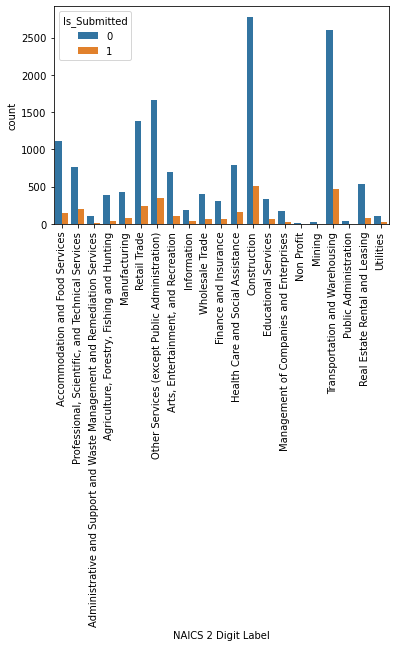

In [364]:
sns.countplot(x = "NAICS 2 Digit Label", hue = "Is_Submitted", data = Lead_filtered)
xticks(rotation = 90)

In [275]:
#print(Lead_filtered['LTTest_Naics'].unique())

In [276]:
Lead_filtered['month'] = pd.DatetimeIndex(Lead_filtered['Lead_Capture_Date']).month

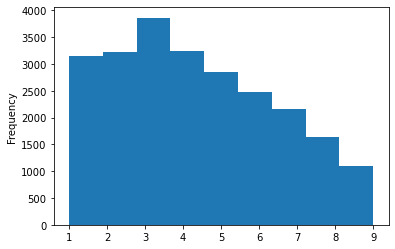

In [277]:
ax = Lead_filtered['month'].plot.hist(bins=9)

In [278]:
NAICS_mask = Lead_filtered.LTTest_Naics.isnull()

Lead_NAICS = Lead_filtered.loc[NAICS_mask,:]
Lead_NAICS

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,LT_FILTERID,LTTest_Naics,...,Web_Gross_Annual_Sales,Web_Time_in_Business,Year_Established,Year_Established.1,Merged Years in Business,LT NAICS Form Value,2 Digit NAICS Code,NAICS 2 Digit Label,NAICS 2 Digit Index,month
0,110000.0,2020-09-01,0,0,2021-09-06,00Q4u00001h77U6EAI,24,LLC,902932,NaN,...,$100k-$200k,1,NaN,2020-01-01,1,NaN,NaN,NaN,NaN,9
1,459000.0,2020-08-01,0,0,2021-08-29,00Q4u00001gxIDDEA2,9,LLC,900069,NaN,...,$200k-$500k,1,NaN,2020-01-01,1,NaN,NaN,NaN,NaN,8
2,100000.0,2020-08-01,0,0,2021-09-02,00Q4u00001gy2XREAY,12,LLC,900068,NaN,...,$100k-$200k,1,NaN,2020-01-01,1,NaN,NaN,NaN,NaN,9
3,300000.0,2020-08-01,0,0,2021-09-05,00Q4u00001h74ILEAY,22,SCORPORATION,900069,NaN,...,$200k-$500k,1,NaN,2020-01-01,1,NaN,NaN,NaN,NaN,9
4,450000.0,2020-07-01,0,0,2021-07-22,00Q4u00001gR6YMEA0,11,SCORPORATION,900069,NaN,...,$200k-$500k,1,NaN,2020-01-01,1,NaN,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45192,NaN,NaT,0,0,2021-06-23,00Q4u00001fu0DDEAY,17,NaN,NaN,NaN,...,NaN,1 to 3 Years,NaN,NaT,1 to 3 Years,NaN,NaN,NaN,NaN,6
47100,NaN,NaT,0,0,2021-07-05,00Q4u00001fvSByEAM,14,NaN,NaN,NaN,...,NaN,Greater than 3 Years,NaN,NaT,Greater than 3 Years,NaN,NaN,NaN,NaN,7
52777,NaN,NaT,0,0,2021-07-31,00Q4u00001gTPIYEA4,8,NaN,NaN,NaN,...,NaN,Less than 6 Months,NaN,NaT,Less than 6 Months,NaN,NaN,NaN,NaN,7
52794,NaN,NaT,0,0,2021-07-31,00Q4u00001gTPWfEAO,17,NaN,NaN,NaN,...,NaN,Greater than 3 Years,NaN,NaT,Greater than 3 Years,NaN,NaN,NaN,NaN,7


In [279]:
Lead_NAICS['month'] = pd.DatetimeIndex(Lead_NAICS['Lead_Capture_Date']).month

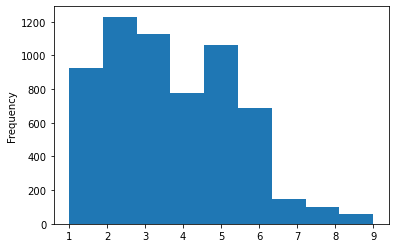

In [280]:
ax = Lead_NAICS['month'].plot.hist(bins=9)

(array([18628., 18659., 18687., 18718., 18748., 18779., 18809., 18840.,
        18871.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

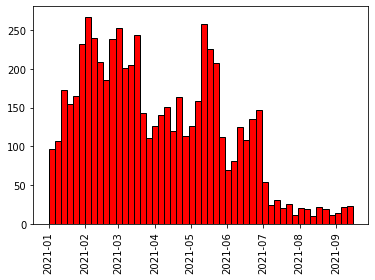

In [281]:
%matplotlib inline
plt.hist(Lead_NAICS.Lead_Capture_Date, bins=50, color='red', edgecolor='black')
plt.xticks(rotation = 90)

In [282]:
NAICS_Count_Data =Lead_NAICS.groupby('Lead_Capture_Date').size().reset_index(name='Count')
NAICS_Count_Data

,Lead_Capture_Date,Count
0,2021-01-01,8
1,2021-01-02,1
2,2021-01-03,1
3,2021-01-04,24
4,2021-01-05,37
...,...,...
246,2021-09-11,2
247,2021-09-12,3
248,2021-09-13,5
249,2021-09-14,2


In [283]:
Lead_filtered.shape

(23676, 30)

In [284]:
Lead_filtered.groupby('Web_Ad_Outlet').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet
1101.0    3372
Name: Is_Submitted, dtype: int64

In [285]:
Lead_filtered.groupby('Web_Amount_to_Borrow').sum()['Is_Submitted'].round(decimals=2)

Web_Amount_to_Borrow
$10000 to $25000     4
$25000 to $50000     0
$5000 to $10000      0
$50000 to $100000    0
150000.00            4
25000.00             8
250000.00            1
5000.00              3
75000.00             4
Name: Is_Submitted, dtype: int64

In [286]:
Lead_filtered.groupby('Is_Submitted').mean()['Lead_Score'].round(decimals=2)

Is_Submitted
0    18.60
1    19.97
Name: Lead_Score, dtype: float64

In [287]:
Lead_filtered.groupby('Web_Gross_Annual_Sales').sum()['Is_Submitted'].round(decimals=2)

Web_Gross_Annual_Sales
$100k-$200k           1310
$1mm+                  107
$200k-$500k           1190
$500k-$1mm             213
Less than $100,000       6
Name: Is_Submitted, dtype: int64

In [288]:
Lead_filtered.groupby('Web_Time_in_Business').sum()['Is_Submitted'].round(decimals=2)

Web_Time_in_Business
1.0                     660
2.0                     506
3.0                     335
4.0                     256
5.0                     190
                       ... 
90                        0
97                        0
99                        0
Greater than 3 Years      7
Less than 6 Months        1
Name: Is_Submitted, Length: 164, dtype: int64

In [289]:
Lead_filtered.groupby('Is_Submitted').mean()['Self_Graded_Credit'].round(decimals=2)

Is_Submitted
0    2.94
1    3.14
Name: Self_Graded_Credit, dtype: float64

In [290]:
Lead_filtered.groupby('Legal_Entity_Type_LT').sum()['Is_Submitted'].round(decimals=2)

Legal_Entity_Type_LT
CORPORATION            297
LLC                   2116
PARTNERSHIP              3
SCORPORATION           500
SOLEPROPRIETORSHIP     435
Name: Is_Submitted, dtype: int64

In [291]:
Lead_filtered = Lead_filtered.drop(['Inception_Date_LT','LTTest_Naics','Type_of_Entity','LT_FILTERID','Web_Form_Name','Web_Amount_to_Borrow','Web_Date','Web_Time_in_Business','Year_Established','SubYearMonth','LT NAICS Form Value','2 Digit NAICS Code','NAICS 2 Digit Label',
'Year_Established.1'], axis=1)
Lead_filtered.sample(10)

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,OPPORTUNITY_ID,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Gross_Annual_Sales,Merged Years in Business,NAICS 2 Digit Index,month
70947,175000.0,0,1,2021-02-08,00Q4u00001dk07FEAQ,19,CORPORATION,0064u000014mi8SAAQ,55000.0,4.0,1101.0,Lending Tree,$100k-$200k,13,12.0,2
62583,137901.0,1,1,2021-07-07,00Q4u00001fvgvWEAQ,21,LLC,0064u000016wuqdAAA,20000.0,4.0,1101.0,Lending Tree,$100k-$200k,1.0,2.0,7
79457,500000.0,0,0,2021-09-02,00Q4u00001gy8ckEAA,17,LLC,0064u000017Txk6AAC,80000.0,3.0,1101.0,Lending Tree,$500k-$1mm,6,21.0,9
69182,200000.0,0,0,2021-05-25,00Q4u00001fMZrsEAG,11,LLC,0064u000015xffvAAA,150000.0,2.0,1101.0,Lending Tree,$200k-$500k,1,9.0,5
74893,100000.0,0,0,2021-04-11,00Q4u00001eYBYEEA4,24,LLC,0064u000015vEAuAAM,10000.0,4.0,1101.0,Lending Tree,$100k-$200k,1,19.0,4
76357,100000.0,0,0,2021-07-19,00Q4u00001fxECfEAM,24,LLC,0064u000016xfJzAAI,15000.0,4.0,1101.0,Lending Tree,$100k-$200k,1,20.0,7
72309,200000.0,0,1,2021-05-06,00Q4u00001f1NkJEAU,19,LLC,0064u000015wbu0AAA,55000.0,4.0,1101.0,Lending Tree,NaN,5,15.0,5
71235,300000.0,0,0,2021-01-21,00Q4u00001dDlHuEAK,24,CORPORATION,0064u000014lpovAAA,40000.0,1.0,1101.0,Lending Tree,$200k-$500k,1,15.0,1
73629,138000.0,0,0,2021-08-22,00Q4u00001gw5mWEAQ,24,LLC,0064u000017TDSxAAO,10000.0,4.0,1101.0,Lending Tree,$100k-$200k,5,16.0,8
1156,171000.0,0,0,2021-02-26,00Q4u00001dmX9JEAU,21,CORPORATION,0064u000014neAsAAI,50000.0,4.0,1101.0,Lending Tree,$100k-$200k,1,NaN,2


In [292]:
Lead_filtered = Lead_filtered.dropna()
Lead_filtered

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,OPPORTUNITY_ID,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Gross_Annual_Sales,Merged Years in Business,NAICS 2 Digit Index,month
62396,220000.0,0,1,2021-09-12,00Q4u00001h8MyqEAE,24,SCORPORATION,0064u000017UZzbAAG,65000.0,4.0,1101.0,Lending Tree,$200k-$500k,1.0,2.0,9
62397,220000.0,0,0,2021-09-05,00Q4u00001gyeL4EAI,24,LLC,0064u000017U94TAAS,10000.0,3.0,1101.0,Lending Tree,$200k-$500k,1.0,2.0,9
62398,200000.0,0,0,2021-09-06,00Q4u00001h77ZsEAI,17,LLC,0064u000017UAz6AAG,250000.0,4.0,1101.0,Lending Tree,$200k-$500k,1.0,2.0,9
62399,250000.0,0,0,2021-09-08,00Q4u00001h7QObEAM,19,LLC,0064u000017UDa6AAG,50000.0,3.0,1101.0,Lending Tree,$200k-$500k,1.0,2.0,9
62400,500000.0,0,0,2021-09-14,00Q4u00001h8g0QEAQ,17,LLC,0064u000017UgTEAA0,100000.0,3.0,1101.0,Lending Tree,$500k-$1mm,1.0,2.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79944,150000.0,0,0,2021-03-22,00Q4u00001e22v0EAA,21,SOLEPROPRIETORSHIP,0064u000014ouGXAAY,15000.0,4.0,1101.0,Lending Tree,$100k-$200k,34,22.0,3
79946,180000.0,0,0,2021-03-09,00Q4u00001e0KxhEAE,15,SCORPORATION,0064u000014oF4HAAU,10000.0,2.0,1101.0,Lending Tree,$100k-$200k,40,22.0,3
79947,175000.0,0,0,2021-01-25,00Q4u00001dF2mXEAS,19,CORPORATION,0064u000014lzSWAAY,65000.0,4.0,1101.0,Lending Tree,$100k-$200k,50,22.0,1
79948,5500000.0,0,0,2021-04-05,00Q4u00001e4E28EAE,18,SCORPORATION,0064u000015uqAmAAI,35000.0,2.0,1101.0,Lending Tree,$1mm+,59,22.0,4


In [293]:
from sklearn.preprocessing import LabelEncoder

Amount_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0, '$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

Lead_filtered['Requested_Amount'].replace(Amount_dict, inplace=True)

#Borrow_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0,'$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

#LeadScore_df['Web_Amount_to_Borrow'].replace(Borrow_dict, inplace=True)

Sales_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}
             
Lead_filtered['Web_Gross_Annual_Sales'].replace(Sales_dict, inplace=True)

Revenue_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}

Lead_filtered['AnnualRevenue'].replace(Revenue_dict, inplace=True)

#LeadScore_df['Web_Ad_Outlet'].replace(Source_dict, inplace=True)

Business_dict = {'0-6 Months':0,'1 to 3 Years':1, '1-3 years':2, '3 years or more':3, '6 Months to 1 Year':4, 'Greater than 3 Years':5,'6-12 Months':6, 'Less than 6 Months':7}
Lead_filtered['Merged Years in Business'].replace(Business_dict, inplace=True)

Entity_dict = {'CORPORATION':0 ,'LLC':1, 'PARTNERSHIP':2, 'SCORPORATION':3, 'SOLEPROPRIETORSHIP':4 }
Lead_filtered['Legal_Entity_Type_LT'].replace(Entity_dict, inplace=True)

Lead_filtered.sample(10)

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,OPPORTUNITY_ID,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Gross_Annual_Sales,Merged Years in Business,NAICS 2 Digit Index,month
75352,120000.0,0,0,2021-02-19,00Q4u00001dlHYbEAM,16,1,0064u000014nKBQAA2,80000.0,3.0,1101.0,Lending Tree,150000.0,2.0,19.0,2
62943,100000.0,0,0,2021-07-26,00Q4u00001gSbmGEAS,24,1,0064u000016y5sPAAQ,10000.0,4.0,1101.0,Lending Tree,150000.0,3.0,2.0,7
63571,225000.0,0,0,2021-01-25,00Q4u00001dEDJjEAO,10,3,0064u000014lz8lAAA,700000.0,2.0,1101.0,Lending Tree,350000.0,31.0,2.0,1
79690,250000.0,0,0,2021-06-24,00Q4u00001fuLsuEAE,18,4,0064u000016wGBCAA2,200000.0,4.0,1101.0,Lending Tree,350000.0,3.0,22.0,6
78202,150000.0,0,0,2021-03-04,00Q4u00001dnEhGEAU,21,1,0064u000014nyZnAAI,15000.0,4.0,1101.0,Lending Tree,150000.0,4.0,20.0,3
62563,280000.0,0,0,2021-02-16,00Q4u00001dkrk4EAA,22,4,0064u000014n6xzAAA,20000.0,4.0,1101.0,Lending Tree,350000.0,1.0,2.0,2
79111,205000.0,0,0,2021-06-03,00Q4u00001fNkHhEAK,13,3,0064u000015yDB7AAM,25000.0,1.0,1101.0,Lending Tree,350000.0,13.0,20.0,6
66302,100000.0,0,0,2021-02-03,00Q4u00001djZM2EAM,12,1,0064u000014mS6FAAU,16000.0,1.0,1101.0,Lending Tree,150000.0,2.0,6.0,2
72460,115000.0,0,1,2021-02-26,00Q4u00001dmWqlEAE,24,3,0064u000014ne2LAAQ,60000.0,3.0,1101.0,Lending Tree,150000.0,6.0,15.0,2
69611,200000.0,0,0,2021-06-05,00Q4u00001fNyt8EAC,15,1,0064u000015yLMmAAM,20000.0,2.0,1101.0,Lending Tree,350000.0,4.0,9.0,6


In [294]:
Lead_filtered.dtypes

AnnualRevenue                      float64
Is_Funded                            int64
Is_Submitted                         int64
Lead_Capture_Date           datetime64[ns]
LEAD_ID                             object
Lead_Score                           int64
Legal_Entity_Type_LT                 int64
OPPORTUNITY_ID                      object
Requested_Amount                   float64
Self_Graded_Credit                 float64
Web_Ad_Outlet                      float64
Web_Ad_Outlet_Source                object
Web_Gross_Annual_Sales             float64
Merged Years in Business           float64
NAICS 2 Digit Index                float64
month                                int64
dtype: object

In [295]:
#Outlet_dict = {"Lending Tree":1}
             
#Lead_filtered['Web_Ad_Outlet_Source'].replace(Outlet_dict, inplace=True)

In [296]:
#Lead_filtered["Requested_Amount"]= pd.to_numeric(Lead_filtered["Requested_Amount"], downcast="float")
#LeadScore_df["AnnualRevenue"]= pd.to_numeric(LeadScore_df["AnnualRevenue"], downcast="float")
#Lead_filtered["Years_in_Business"]= pd.to_numeric(Lead_filtered["Years_in_Business"], downcast="float")
#Lead_filtered["Web_Ad_Outlet_Source"]= pd.to_numeric(Lead_filtered["Web_Ad_Outlet_Source"], downcast="float")

#LeadScore_df.head()                                                 

In [297]:
Lead_filtered.describe()

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Legal_Entity_Type_LT,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Gross_Annual_Sales,Merged Years in Business,NAICS 2 Digit Index,month
count,1.516700e+04,15167.000000,15167.000000,15167.000000,15167.000000,1.516700e+04,15167.000000,15167.0,15167.000000,15167.000000,15167.000000,15167.000000
mean,4.295512e+05,0.023802,0.147425,18.566097,1.716622,7.195703e+04,2.892200,1101.0,335161.864574,6.209929,12.307642,4.508604
std,2.802012e+06,0.152436,0.354541,4.061439,1.264923,1.363080e+05,1.018708,0.0,215557.415052,7.993303,6.481822,2.583597
min,1.000000e+05,0.000000,0.000000,8.000000,0.000000,2.000000e+03,1.000000,1101.0,150000.000000,1.000000,1.000000,1.000000
25%,1.480000e+05,0.000000,0.000000,16.000000,1.000000,2.000000e+04,2.000000,1101.0,150000.000000,2.000000,6.000000,2.000000
50%,2.000000e+05,0.000000,0.000000,19.000000,1.000000,4.000000e+04,3.000000,1101.0,350000.000000,3.000000,15.000000,4.000000
75%,2.872615e+05,0.000000,0.000000,22.000000,3.000000,8.000000e+04,4.000000,1101.0,350000.000000,7.000000,19.000000,7.000000
max,1.000000e+08,1.000000,1.000000,24.000000,4.000000,2.000000e+06,4.000000,1101.0,1000000.000000,106.000000,22.000000,9.000000


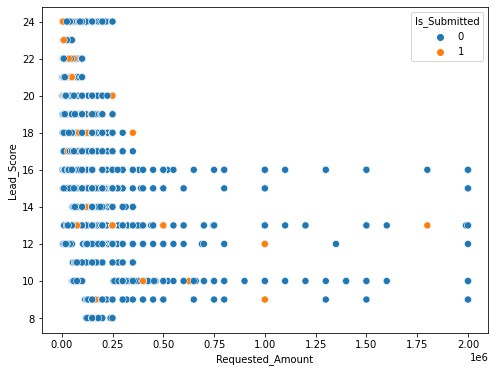

In [298]:
#%matplotlib inline
plt.figure(figsize=(8,6))
sns.scatterplot("Requested_Amount","Lead_Score", hue="Is_Submitted", data=Lead_filtered, s=50)
plt.show()

In [299]:
Submitted = (sum(Lead_filtered["Is_Submitted"])/len(Lead_filtered['Is_Submitted'].index))*100
Submitted

14.742533131139975

In [300]:
Lead_cluster_data = Lead_filtered.groupby(['Is_Submitted']).mean()
Lead_cluster_data

,AnnualRevenue,Is_Funded,Lead_Score,Legal_Entity_Type_LT,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Gross_Annual_Sales,Merged Years in Business,NAICS 2 Digit Index,month
Is_Submitted,,,,,,,,,,,
0,451119.597711,0.000077,18.356972,1.729719,76385.226587,2.855696,1101.0,341624.777666,6.380094,12.251798,4.527569
1,304819.405635,0.161002,19.775492,1.640877,46348.342129,3.103309,1101.0,297786.225403,5.225850,12.630590,4.398927


In [301]:
Lead_filtered.corr()

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Legal_Entity_Type_LT,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Gross_Annual_Sales,Merged Years in Business,NAICS 2 Digit Index,month
AnnualRevenue,1.000000,0.003384,-0.018511,-0.002697,-0.025299,0.017873,-0.005815,NaN,0.241837,0.047194,0.001044,0.045931
Is_Funded,0.003384,1.000000,0.374284,0.048740,-0.018363,-0.032751,0.011853,NaN,-0.029284,-0.027912,-0.005476,-0.013663
Is_Submitted,-0.018511,0.374284,1.000000,0.123829,-0.024901,-0.078127,0.086177,NaN,-0.072104,-0.051196,0.020719,-0.017653
Lead_Score,-0.002697,0.048740,0.123829,1.000000,0.022719,-0.313030,0.608314,NaN,-0.114589,-0.111805,0.007075,-0.012912
Legal_Entity_Type_LT,-0.025299,-0.018363,-0.024901,0.022719,1.000000,-0.011435,0.178823,NaN,-0.112189,0.074835,-0.027864,-0.132760
Requested_Amount,0.017873,-0.032751,-0.078127,-0.313030,-0.011435,1.000000,-0.104997,NaN,0.139797,0.075486,-0.022615,-0.013472
Self_Graded_Credit,-0.005815,0.011853,0.086177,0.608314,0.178823,-0.104997,1.000000,NaN,-0.064487,-0.088958,-0.005013,-0.055703
Web_Ad_Outlet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Web_Gross_Annual_Sales,0.241837,-0.029284,-0.072104,-0.114589,-0.112189,0.139797,-0.064487,NaN,1.000000,0.150180,-0.065739,0.251163
Merged Years in Business,0.047194,-0.027912,-0.051196,-0.111805,0.074835,0.075486,-0.088958,NaN,0.150180,1.000000,-0.059218,0.025698


In [302]:
X = Lead_filtered[['Requested_Amount','AnnualRevenue','Web_Gross_Annual_Sales',
                 'Lead_Score','Self_Graded_Credit','Merged Years in Business','Legal_Entity_Type_LT','NAICS 2 Digit Index']]

y = Lead_filtered[['Is_Submitted']]

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [304]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [305]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                10616
Model:                            GLM   Df Residuals:                    10607
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4214.5
Date:                Mon, 27 Sep 2021   Deviance:                       8428.9
Time:                        12:02:03   Pearson chi2:                 1.11e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2297      0.131    -17.029      0.000      -2.486      -1.973
x1            -6.6963      1.147     -5.836      0.000      -8.945      -4.447
x2            -3.4641      3.792     -0.913      0.361     -10.896       3.968
x3            -0.5029      0.141     -3.577      0.000      -0.778      -0.227
x4             0.8304      0.154      5.408      0.000       0.529       1.131
x5             0.2583      0.106      2.427      0.015       0.050       0.467
x6            -0.9612      0.447     -2.148      0.032      -1.838      -0.084
x7            -0.2162      0.092     -2.341      0.019      -0.397      -0.035
x8             0.2116      0.091      2.320      0.020       0.033       0.390
==============================================================================
"""

In [306]:
X_train.shape, y_train.shape

((10616, 8), (10616, 1))

In [307]:
X_test.shape, y_test.shape

((4551, 8), (4551, 1))

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),X,y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)


[learning_curve] Training set sizes: [  136   412   688   963  1239  1515  1791  2067  2342  2618  2894  3170
  3445  3721  3997  4273  4549  4824  5100  5376  5652  5928  6203  6479
  6755  7031  7306  7582  7858  8134  8410  8685  8961  9237  9513  9789
 10064 10340 10616 10892 11167 11443 11719 11995 12271 12546 12822 13098
 13374 13650]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


In [181]:
train_mean = np.mean(train_scores, axis =1)
train_mean

array([0.98014706, 0.9868932 , 0.98938953, 0.99065421, 0.98748991,
       0.9879868 , 0.98754886, 0.98771166, 0.98774552, 0.98483575,
       0.98082239, 0.98094637, 0.98023222, 0.98051599, 0.98088566,
       0.98109057, 0.98111673, 0.98179934, 0.9824902 , 0.98251488,
       0.98248408, 0.98267544, 0.98260519, 0.98238926, 0.98256107,
       0.98274783, 0.98256228, 0.98299921, 0.98275643, 0.98294812,
       0.98321046, 0.98302821, 0.98312688, 0.9831114 , 0.98300221,
       0.98323629, 0.98328696, 0.98337524, 0.98336473, 0.9831895 ,
       0.98286917, 0.98280171, 0.98253264, 0.98233431, 0.98223454,
       0.98217759, 0.98217907, 0.98234082, 0.98253327, 0.98249817])

In [182]:
train_std = np.std(train_scores, axis=1)
train_std

array([0.00661765, 0.00436893, 0.00305233, 0.0004644 , 0.00337153,
       0.00436643, 0.0043253 , 0.00509799, 0.00446624, 0.00341667,
       0.00300145, 0.00289534, 0.00334876, 0.00353734, 0.00307476,
       0.00277458, 0.0023336 , 0.00198789, 0.00183739, 0.00184518,
       0.00177635, 0.001727  , 0.00175485, 0.00143707, 0.00142271,
       0.00126901, 0.00124427, 0.00119498, 0.00128178, 0.0013378 ,
       0.00135553, 0.00130795, 0.00126728, 0.00114162, 0.00109349,
       0.00103822, 0.00101798, 0.00100548, 0.00089878, 0.0009231 ,
       0.00085147, 0.00083163, 0.0008736 , 0.00088343, 0.00084218,
       0.00079882, 0.00082335, 0.0007696 , 0.00076414, 0.00073949])

In [183]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([0.84472874, 0.81413475, 0.83351958, 0.83450855, 0.8505307 ,
       0.79133492, 0.81651338, 0.80965496, 0.82508479, 0.82495173,
       0.82778688, 0.82211741, 0.81961012, 0.82468553, 0.82396007,
       0.82330127, 0.7958118 , 0.7995026 , 0.80695212, 0.80978758,
       0.81545836, 0.81492961, 0.8039894 , 0.80445096, 0.80866947,
       0.8114377 , 0.81282236, 0.79785979, 0.80141784, 0.80056097,
       0.80056032, 0.80735025, 0.8076141 , 0.80866812, 0.81044964,
       0.81565712, 0.81361365, 0.81737216, 0.82198661, 0.81855727,
       0.81835895, 0.81915007, 0.81835869, 0.81730411, 0.81598328,
       0.8190178 , 0.81723788, 0.81750204, 0.82185343, 0.8225128 ])

In [184]:
test_std = np.std(test_scores, axis=1)
test_std

array([0.00421163, 0.01372298, 0.00983947, 0.00885204, 0.00198236,
       0.17633779, 0.0814148 , 0.0771243 , 0.06681253, 0.05614925,
       0.0493785 , 0.04875689, 0.04530033, 0.03161048, 0.03015873,
       0.03347174, 0.08152656, 0.06916284, 0.05207502, 0.05320703,
       0.04603853, 0.04193644, 0.05965495, 0.05965212, 0.05297818,
       0.0436421 , 0.04209251, 0.06522536, 0.05366875, 0.05020003,
       0.04851221, 0.04053559, 0.03818017, 0.03761379, 0.03721466,
       0.02976   , 0.03145407, 0.03050648, 0.02755466, 0.02703202,
       0.02466712, 0.02545175, 0.02459857, 0.02469326, 0.02567258,
       0.0247299 , 0.02599114, 0.02503014, 0.02331833, 0.0229971 ])

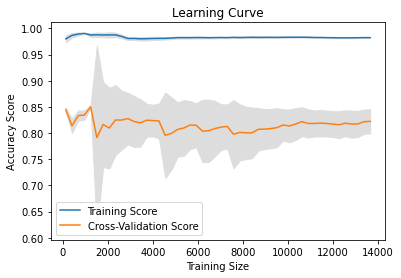

In [185]:
plt.plot(train_sizes, train_mean, label= 'Training Score')
plt.plot(train_sizes, test_mean, label= 'Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

In [308]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.010632
Feature 1: 0.010568
Feature 2: 0.000000
Feature 3: 0.008899
Feature 4: 0.004569
Feature 5: 0.000474
Feature 6: 0.004250
Feature 7: 0.005531


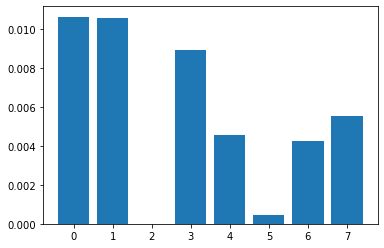

In [309]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [310]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [311]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 8)             # running RFE with 8 variables as output
rfe = rfe.fit(X_train, y_train)

In [312]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [313]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [314]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Requested_Amount', True, 1),
 ('AnnualRevenue', True, 1),
 ('Web_Gross_Annual_Sales', True, 1),
 ('Lead_Score', True, 1),
 ('Self_Graded_Credit', True, 1),
 ('Merged Years in Business', True, 1),
 ('Legal_Entity_Type_LT', True, 1),
 ('NAICS 2 Digit Index', True, 1)]

In [315]:
col = X_train.columns[rfe.support_]
col

Index(['Requested_Amount', 'AnnualRevenue', 'Web_Gross_Annual_Sales',
       'Lead_Score', 'Self_Graded_Credit', 'Merged Years in Business',
       'Legal_Entity_Type_LT', 'NAICS 2 Digit Index'],
      dtype='object')

In [316]:
X_train_sm = sm.add_constant(X_train[col].values)

X_train_sm = sm.add_constant(X_train[col].values)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                10616
Model:                            GLM   Df Residuals:                    10607
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4214.5
Date:                Mon, 27 Sep 2021   Deviance:                       8428.9
Time:                        12:04:56   Pearson chi2:                 1.11e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2297      0.131    -17.029      0.000      -2.486      -1.973
x1            -6.6963      1.147     -5.836      0.000      -8.945      -4.447
x2            -3.4641      3.792     -0.913      0.361     -10.896       3.968
x3            -0.5029      0.141     -3.577      0.000      -0.778      -0.227
x4             0.8304      0.154      5.408      0.000       0.529       1.131
x5             0.2583      0.106      2.427      0.015       0.050       0.467
x6            -0.9612      0.447     -2.148      0.032      -1.838      -0.084
x7            -0.2162      0.092     -2.341      0.019      -0.397      -0.035
x8             0.2116      0.091      2.320      0.020       0.033       0.390
==============================================================================
"""

In [317]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.16848196, 0.22554731, 0.13993569, 0.15601775, 0.17644675,
       0.14494462, 0.09726871, 0.13755016, 0.15829693, 0.01342237])

In [318]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([0.16848196, 0.22554731, 0.13993569, 0.15601775, 0.17644675,
       0.14494462, 0.09726871, 0.13755016, 0.15829693, 0.01342237])

In [319]:
# find the predicted-prob
Submitted_prob = y_train_pred
Submitted = y_train.values
y_train_pred_final = pd.DataFrame(Submitted,Submitted_prob)
                                  
                                   
y_train_pred_final['Prospect_ID'] = y_train.index

y_train_pred_final

,0,Prospect_ID
0.168482,0,67509
0.225547,0,77531
0.139936,0,75845
0.156018,0,77595
0.176447,0,70153
...,...,...
0.241716,0,77568
0.107878,0,66170
0.128342,1,73785
0.261058,0,74893


In [206]:
y_train_pred_final.reset_index(inplace=True)

In [207]:
y_train_pred_final.rename(columns = {"index":"Submitted_Prob", 0:"Submitted"}, inplace=True)

In [208]:
y_train_pred_final['predicted'] = y_train_pred_final.Submitted_Prob.apply(lambda x: 1 if x > 0.14 else 0)

# Let's see the head
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,predicted
0,0.168482,0,67509,1
1,0.225547,0,77531,1
2,0.139936,0,75845,0
3,0.156018,0,77595,1
4,0.176447,0,70153,1


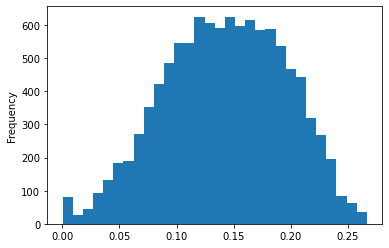

In [209]:
ax = y_train_pred_final['Submitted_Prob'].plot.hist(bins=30)

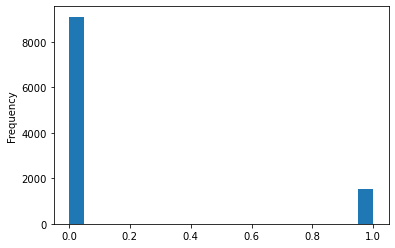

In [210]:
ax = y_train_pred_final['Submitted'].plot.hist(bins=20)

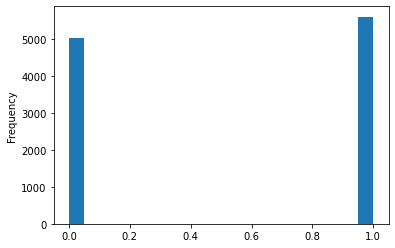

In [211]:
ax = y_train_pred_final['predicted'].plot.hist(bins=20)

In [214]:
y_train_pred_final.to_csv('Sub_probLN.csv', index = True)

In [215]:
import imblearn

In [320]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
# fit predictor and target 

variablex_ros, y_ros = ros.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'Is_Submitted': 1})
Resample dataset shape Counter({'Is_Submitted': 1})


In [321]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({'Is_Submitted': 1})


In [322]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.834


In [323]:
#  Logistic regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [324]:
accuracy_logreg = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

Cross Validation Scores for Log Reg: [0.52677363 0.54842451 0.5324826  0.53634957 0.52745553]
Mean Accuracy Score for Log Reg: 0.5342971694453128



In [325]:
accuracy_score(y_test,y_pred, normalize=True) * 100

84.13535486706219

In [326]:
print("Training score:", model.score(X_train, y_train))

Training score: 0.8573850791258478


In [223]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(model,  X, y, scoring=scoring, cv=5, 
                        return_train_score=False)

In [224]:
scores

{'fit_time': array([0.0350039 , 0.03300381, 0.0200727 , 0.03126192, 0.01563215]),
 'score_time': array([0.01100063, 0.00999999, 0.        , 0.01562619, 0.01863742]),
 'test_acc': array([0.52600039, 0.53759907, 0.53518948, 0.53905646, 0.52977572]),
 'test_prec': array([0.53706755, 0.55306346, 0.55603448, 0.56011905, 0.58536585]),
 'test_rec': array([0.37804407, 0.39095128, 0.34918794, 0.36388244, 0.20417633]),
 'test_f1': array([0.44373866, 0.4580879 , 0.42897862, 0.44116268, 0.30275229])}

In [225]:
KNN_model = KNeighborsClassifier()

In [226]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.73748309 0.74502223 0.73163186 0.74381284 0.741686  ]
Mean Accuracy Score for KNN: 0.7399272039707632


In [227]:
param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 1}
Best Cross Vlidation Score: 0.7870619339604519


In [327]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None],
             'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'splitter': 'random'}

In [328]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'],
                                       criterion= grid_search.best_params_['criterion'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

In [329]:
y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 65.1835429985564
Out-of-sample Accuracy: 64.9860810392824


In [330]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix
[[1644 1556]
 [ 708 2558]]
              precision    recall  f1-score   support

           0       0.70      0.51      0.59      3200
           1       0.62      0.78      0.69      3266

    accuracy                           0.65      6466
   macro avg       0.66      0.65      0.64      6466
weighted avg       0.66      0.65      0.64      6466



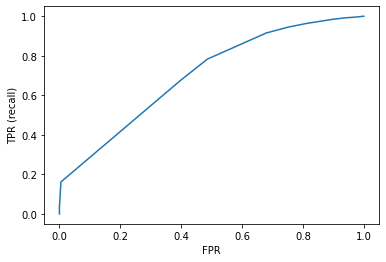

In [331]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [332]:
y_pred_prob =model.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

In [333]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

AUC for logreg: 0.703


In [334]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,X,y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.59008671 0.32887017 0.55400368 0.76002617 0.30652237]


In [335]:
feature_names = X =Lead_filtered[['Requested_Amount','AnnualRevenue','Web_Gross_Annual_Sales',
                 'Lead_Score','Self_Graded_Credit','Merged Years in Business','Legal_Entity_Type_LT','NAICS 2 Digit Index']]

In [336]:
#print(feature_names)
model.feature_importances_

array([0.00086803, 0.01173641, 0.        , 0.06736483, 0.35644439,
       0.        , 0.56242193, 0.00116441])

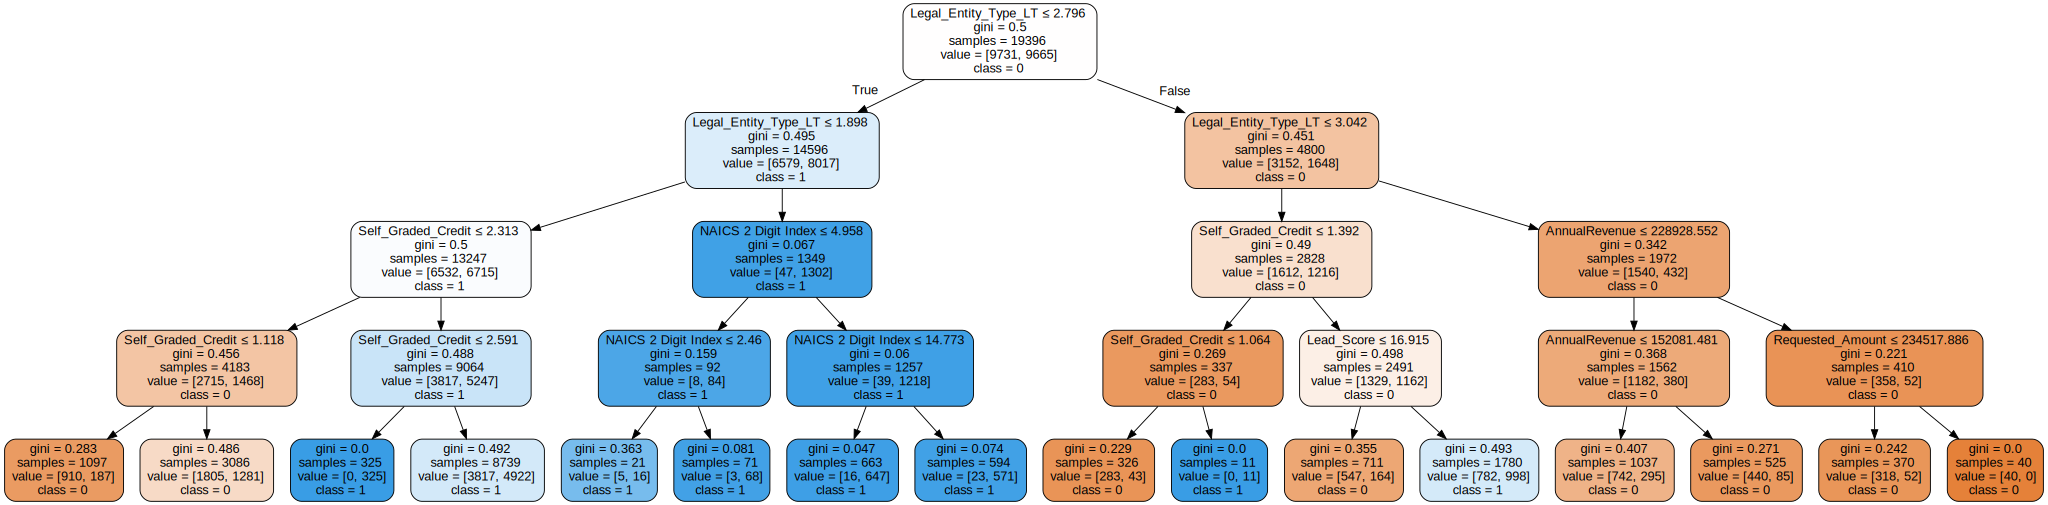

<Figure size 1440x1080 with 0 Axes>

In [337]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(20,15))

class_names = ['0', '1']
feature_names = X.columns

dot_data = tree.export_graphviz(model, 
                  feature_names=feature_names, 
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)
                           
graph = graphviz.Source(dot_data)
graph

In [338]:
graph.render("decision_treeLeadLN_graphviz")
'decision_treeLeadLN_graphviz.png'

'decision_treeLeadLN_graphviz.png'

In [339]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()

,Feature_Importance
Legal_Entity_Type_LT,0.562422
Self_Graded_Credit,0.356444
Lead_Score,0.067365
AnnualRevenue,0.011736
NAICS 2 Digit Index,0.001164


In [340]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100
print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 99.13899773149103
Out-of-sample Accuracy: 89.15867615218063


In [341]:
feature_names = X =Lead_filtered[['Requested_Amount','AnnualRevenue','Web_Gross_Annual_Sales',
                 'Lead_Score','Self_Graded_Credit','Merged Years in Business','Legal_Entity_Type_LT','NAICS 2 Digit Index']]

In [342]:
model.feature_importances_

array([0.12634714, 0.14084879, 0.01809932, 0.07850157, 0.22790531,
       0.15934544, 0.0859702 , 0.16298223])

In [343]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [344]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [345]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6189297865759357


In [ ]:
# Random sample of 200 rows
#df.sample(n=200).head(10)


# Saving the randomly sampled rows:
#df200 = df.sample(n=200)
#df200.shape
# Output: (200, 5)

In [ ]:
#len(CreditRisk_merge['contract_number'].unique())